# Multi-class Classification


We'll work with 10 different types of food.

1. Become one with the data (visualize, visualize, visualize...)
2. Preprocess the data (prepare it for a model)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve model (try to beat your baseline)
7. Repeat until satisfied

In [1]:
import tensorflow as tf
tf.__version__

'2.12.0'

##1. Import and become one with the data

Again, we've got a subset of the [Food101 dataset](https://www.kaggle.com/datasets/dansbecker/food-101). We will use only 10 classes of food101 dataset for this project.




In [2]:
import zipfile

# Download zip file of 10_food_classes images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-08-13 07:16:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  45.2MB/s    in 6.3s    

2023-08-13 07:16:41 (78.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



Now let's check out all of the different directories and sub-directories in the 10_food_classes file.



In [3]:
#Import helper function
!wget https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-Extraa/TensorFlow/helper_functions.py

--2023-08-13 07:16:46--  https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-Extraa/TensorFlow/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15781 (15K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  15.41K  --.-KB/s    in 0s      

2023-08-13 07:16:46 (72.4 MB/s) - ‘helper_functions.py’ saved [15781/15781]



In [4]:
from helper_functions import walk_through_dir

In [5]:
walk_through_dir("10_food_classes_all_data")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 

Noice..!

In [6]:
# Setting train_dir and test_dir
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

And getting the class names from the subdirectories.



In [7]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [8]:
from helper_functions import view_random_image

Image shape: (512, 512, 3)


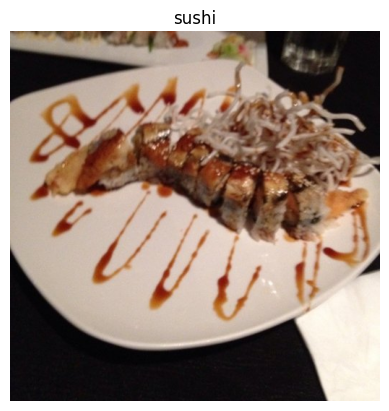

In [11]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

## 2. Preprocess the data (prepare it for a model)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical for multi-class (bianary for 2 classes)

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


##3. Create a model

We can use the same model (TinyVGG) with simple differences

### Starting with basline  model

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model
model_1 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_1.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


##4. Fit a model

In [15]:
# Fit the model
history_1 = model_1.fit(train_data, # 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 42s 126ms/step - loss: 2.2627 - accuracy: 0.1488 - val_loss: 2.1534 - val_accuracy: 0.2176
Epoch 2/5
235/235 [==============================] - 32s 136ms/step - loss: 2.0278 - accuracy: 0.2839 - val_loss: 1.9674 - val_accuracy: 0.2908
Epoch 3/5
235/235 [==============================] - 31s 131ms/step - loss: 1.7643 - accuracy: 0.4068 - val_loss: 1.9821 - val_accuracy: 0.3024
Epoch 4/5
235/235 [==============================] - 31s 132ms/step - loss: 1.2755 - accuracy: 0.5800 - val_loss: 2.1764 - val_accuracy: 0.2984
Epoch 5/5
235/235 [==============================] - 28s 119ms/step - loss: 0.5894 - accuracy: 0.8172 - val_loss: 3.1451 - val_accuracy: 0.2600


 the more data you have, the longer a model will take to find patterns.

##5. Evaluate the model

In [16]:
# Evaluate on the test data
model_1.evaluate(test_data)

79/79 [==============================] - 6s 81ms/step - loss: 3.1451 - accuracy: 0.2600


[3.1451194286346436, 0.25999999046325684]

In [17]:
from helper_functions import plot_loss_curves

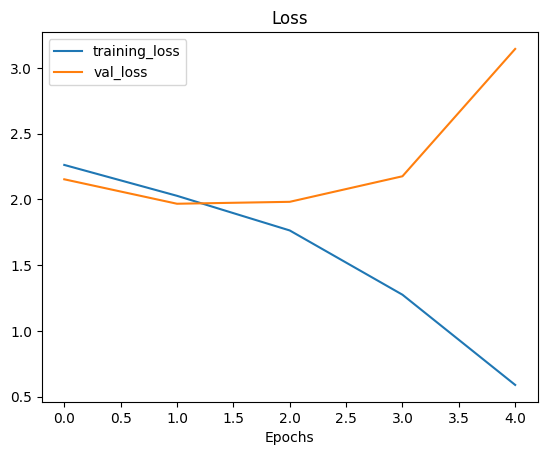

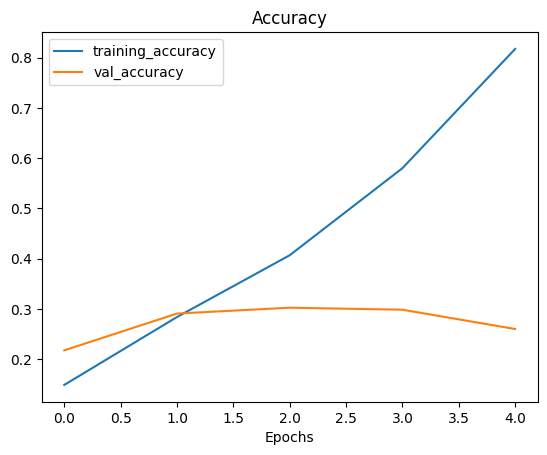

In [18]:
# Check out the model's loss curves on the 10 classes of data
plot_loss_curves(history_1)

Both curves are getting away from each other ,

Thats because of **Overfitting**.

it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test data.

##6. Adjust the model parameters

Try and prevent our model from overfitting. A couple of ways to prevent overfitting include:

1. **Get more data** - Having more data gives the model more opportunities to learn patterns, patterns which may be more generalizable to new examples.
2. **Simplify model** - If the current model is already overfitting the training data, it may be too complicated of a model. This means it's learning the patterns of the data too well and isn't able to generalize well to unseen data. One way to simplify a model is to reduce the number of layers it uses or to reduce the number of hidden units in each layer.
3. **Use data augmentation** - Data augmentation manipulates the training data in a way so that's harder for the model to learn as it artificially adds more variety to the data. If a model is able to learn patterns in augmented data, the model may be able to generalize better to unseen data.
4. **Use transfer learning** - Transfer learning involves leverages the patterns (also called pretrained weights) one model has learned to use as the foundation for your own task. In our case, we could use one computer vision model pretrained on a large variety of images and then tweak it slightly to be more specialized for food images.

Also called **regularisation**.

Since collecting more data would involve us manually taking more images of food, let's try the ones we can do from right within the notebook.

We will simplify our model first.

To do so, we'll remove two of the convolutional layers, taking the total number of convolutional layers from four to two.

In [19]:
# Try a simplified model (removed two layers)
model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_2.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 30s 120ms/step - loss: 2.1327 - accuracy: 0.2348 - val_loss: 2.0218 - val_accuracy: 0.2844
Epoch 2/5
235/235 [==============================] - 27s 115ms/step - loss: 1.8306 - accuracy: 0.3671 - val_loss: 1.9393 - val_accuracy: 0.3180
Epoch 3/5
235/235 [==============================] - 26s 111ms/step - loss: 1.4441 - accuracy: 0.5241 - val_loss: 2.0052 - val_accuracy: 0.3132
Epoch 4/5
235/235 [==============================] - 27s 114ms/step - loss: 0.9545 - accuracy: 0.7041 - val_loss: 2.2136 - val_accuracy: 0.3200
Epoch 5/5
235/235 [==============================] - 28s 121ms/step - loss: 0.5209 - accuracy: 0.8481 - val_loss: 2.6953 - val_accuracy: 0.2980


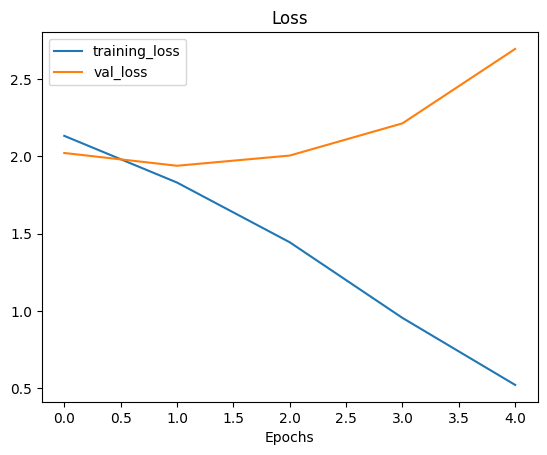

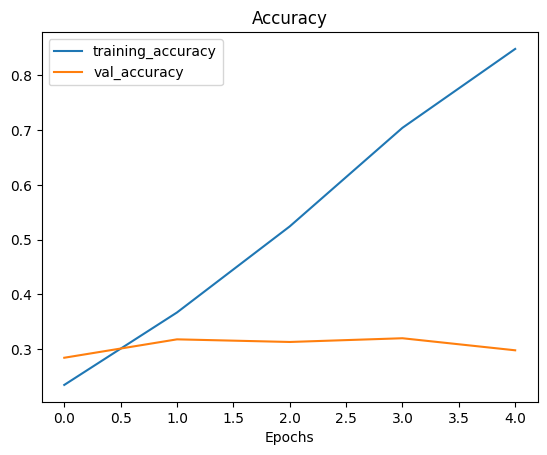

In [20]:
# Check out the loss curves of model_2
plot_loss_curves(history_2)

Even with a simplifed model, it looks like our model is still dramatically overfitting the training data

**Data augmentation:**

Data augmentation makes it harder for the model to learn on the training data and in turn, hopefully making the patterns it learns more generalizable to unseen data.

In [21]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


Now we've got augmented data, let's see how it works with the same model as before (model_2).



Rather than rewrite the model from scratch, we can clone it using a handy function in TensorFlow called **clone_model** which can take an existing model and rebuild it in the same format.

In [22]:
# Clone the model (use the same architecture)
model_3 = tf.keras.models.clone_model(model_2)

# Compile the cloned model (same setup as used for model_2)
model_3.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 101s 423ms/step - loss: 2.3210 - accuracy: 0.1312 - val_loss: 2.2356 - val_accuracy: 0.1724
Epoch 2/5
235/235 [==============================] - 98s 418ms/step - loss: 2.1927 - accuracy: 0.1912 - val_loss: 2.0672 - val_accuracy: 0.2372
Epoch 3/5
235/235 [==============================] - 99s 421ms/step - loss: 2.1235 - accuracy: 0.2296 - val_loss: 2.0035 - val_accuracy: 0.3048
Epoch 4/5
235/235 [==============================] - 102s 434ms/step - loss: 2.0432 - accuracy: 0.2805 - val_loss: 1.9041 - val_accuracy: 0.3484
Epoch 5/5
235/235 [==============================] - 98s 417ms/step - loss: 1.9853 - accuracy: 0.3055 - val_loss: 1.8736 - val_accuracy: 0.3452


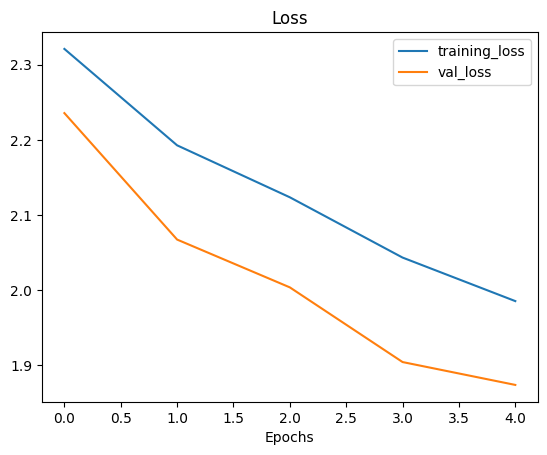

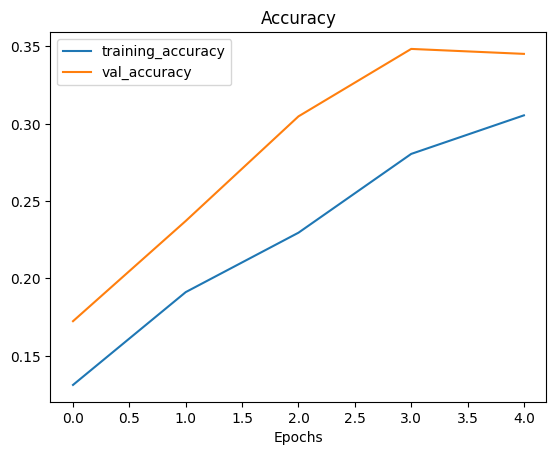

In [23]:
# Check out our model's performance with augmented data
plot_loss_curves(history_3)

Nice..!

#Making a prediction with our trained model

In [24]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [25]:
# ~q is for quite
!wget ~q https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-Extraa/TensorFlow/images/3-CNN-Classification/03-hamburger.jpeg
!wget ~q https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-Extraa/TensorFlow/images/3-CNN-Classification/03-pizza-dad.jpeg
!wget ~q https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-Extraa/TensorFlow/images/3-CNN-Classification/03-steak.jpeg
!wget ~q https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-Extraa/TensorFlow/images/3-CNN-Classification/03-sushi.jpeg

--2023-08-13 07:34:32--  http://~q/
Resolving ~q (~q)... failed: Name or service not known.
wget: unable to resolve host address ‘~q’
--2023-08-13 07:34:32--  https://raw.githubusercontent.com/nikbhaladhare2104/TensorFlow-Extraa/TensorFlow/images/3-CNN-Classification/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.04s   

2023-08-13 07:34:32 (83.8 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]

FINISHED --2023-08-13 07:34:32--
Total wall clock time: 0.4s
Downloaded: 1 files, 3.4M in 0.04s (83.8 MB/s)
--2023-08-13 07:34:32--  http://~q/
Resolving ~q (~q)... failed: Name or service not known.
wget: unable t

In [27]:
from helper_functions import pred_and_plot

1/1 [==============================] - 0s 149ms/step


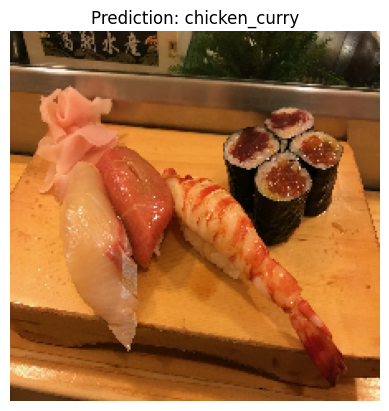

In [29]:
pred_and_plot(model_3,
              filename="03-sushi.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 24ms/step


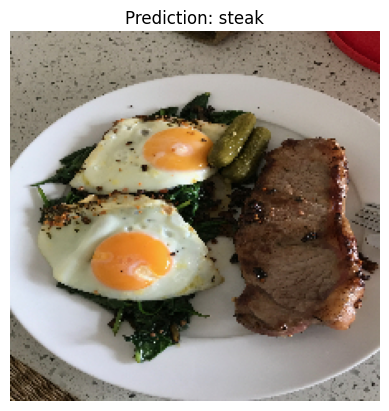

In [30]:
pred_and_plot(model_3,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 21ms/step


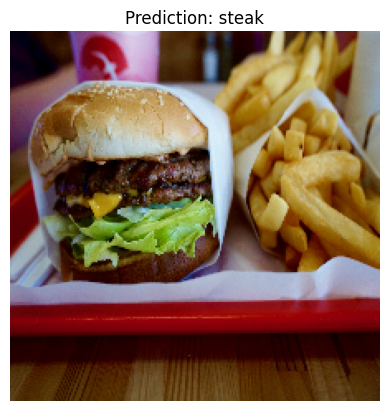

In [31]:
pred_and_plot(model_3,
              filename="03-hamburger.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 19ms/step


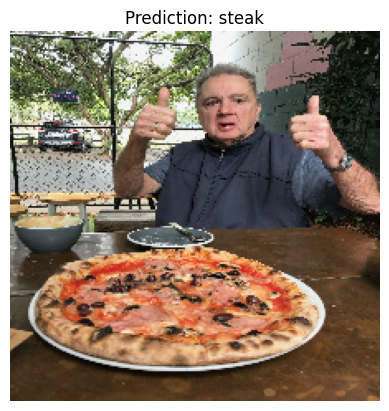

In [32]:
pred_and_plot(model_3,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

Our model's predictions aren't very good, this is because it's only performing at ~35% accuracy on the test dataset.

We will increse the accuracy using transfer learning

#Saving and loading our model

Once you've trained a model, you probably want to be able to save it and load it somewhere else.

To do so, we can use the save and load_model functions.

In [33]:
# Save a model
model_3.save("saved_trained_model")

In [34]:
# Load in a model and evaluate it
loaded_model_3 = tf.keras.models.load_model("saved_trained_model")
loaded_model_3.evaluate(test_data)

79/79 [==============================] - 6s 80ms/step - loss: 1.8736 - accuracy: 0.3452


[1.8736456632614136, 0.3452000021934509]

In [35]:
# Compare our unsaved model's results (same as above)
model_3.evaluate(test_data)

79/79 [==============================] - 6s 80ms/step - loss: 1.8736 - accuracy: 0.3452


[1.873645305633545, 0.3452000021934509]

EQUAL ...!